# Задание 1

### Цель: проверить гипотезу о том, что средняя вероятность клика в первой половине датасета (по времени) и во второй половине датасета (по времени) не отличаются.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
from numpy.random import binomial
from numpy.random import normal
import pandas as pd
from sklearn.model_selection import train_test_split

Отсортируйте данные по времени и разбейте на две равные части - part1 и part2.

In [5]:
df = pd.read_csv("advertising.csv")
df = df[['Timestamp','Clicked on Ad']].copy()

df.sort_values(by='Timestamp', inplace=True)

part1 = df.iloc[:500]
part2 = df.iloc[500:]

part1.shape, part2.shape

((500, 2), (500, 2))

Создайте два массива - sample1 и sample2, содержащие значения из столбца Clicked on Ad для part1 и part2 соответственно.

In [6]:
#your code here
sample1 = part1['Clicked on Ad'].values
sample2 = part2['Clicked on Ad'].values

Вычислите выборочное среднее для каждого сэмпла (mean1, mean2) и вычислите разность этих средних значений (diff).

In [7]:
#your code here
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)

diff = mean1 - mean2
print('mean1:', mean1)
print('mean2:', mean2)
print('diff:', diff)

mean1: 0.49
mean2: 0.51
diff: -0.020000000000000018


***Нулевая гипотеза: средние вероятности кликов не отличаются.***

Для проверки вычислите выборочную дисперсию (std_pool).

In [8]:
#your code here
N = 500

std_pool = np.sqrt(mean1 * (1-mean1) / N + mean2 * (1-mean2) / N)

Вычислите величину отступа (margin) для уровня доверия 95% (двусторонний критерий).

In [10]:
confidence = 0.975
z = st.norm.ppf(confidence)

margin = z * std_pool

print('confidence interval: ', -margin, ' +', margin)
#your code here

confidence interval:  -0.061967106089972024  + 0.061967106089972024


Проверьте нулевую гипотезу. Отвергаем её, если |diff| > margin.

In [11]:
#your code here
abs(diff) > margin

False

# Задание 2.
Проверьте гипотезу о том, что среднее время, проведенное на сайте (Daily Time Spent on Site), не зависит от времени.

Дисперсия суммы независимых случайных величин равна сумме их дисперсий.

In [12]:
#your code here
df = pd.read_csv("advertising.csv")
df = df[['Timestamp','Daily Time Spent on Site']].copy()
df.head()

,Timestamp,Daily Time Spent on Site
0,2016-03-27 00:53:11,68.95
1,2016-04-04 01:39:02,80.23
2,2016-03-13 20:35:42,69.47
3,2016-01-10 02:31:19,74.15
4,2016-06-03 03:36:18,68.37


(array([ 61.,  95.,  81.,  72.,  83., 102., 123., 170., 151.,  62.]),
 array([32.6  , 38.483, 44.366, 50.249, 56.132, 62.015, 67.898, 73.781,
        79.664, 85.547, 91.43 ]),
 <a list of 10 Patch objects>)

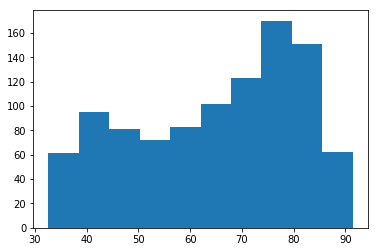

In [14]:
plt.hist(df['Daily Time Spent on Site'])